# __How Do People Feel About New Video Games Versus Old Video Games?__

_In today's age, video games are an extremely common hobby around the world. It can provide a sense of fun, distraction, and community for the people who play them. However, I have noticed that a lot of people will say negative things about modern gaming. They say that "new games are bad" and "the games don't have spirit in them", and "gaming used to be good". This got me wondering, are new games actually as unfavorable as older games? I want to find out whether or not modern video games are actually as unfavorable as people seem to say, or if people are looking at older games with rose tinted glasses._

_To do this, I will be comparing the reviews of games from GameSpot to get a general consensus on how people feel about old versus new video games._

I will start off by importing the tools that I need to complete this analysis.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import urllib
import requests
import numpy as np

I need to retrieve the API keys from GameSpot.

In [3]:
api_key = pd.read_csv(r"C:\Users\Alex Buckler\data_SKOOBY\GamesKey.txt")
key_s = api_key['GamesKey'].iloc[0]

In [4]:
header = {'User-agent': 'Mozilla/5.0'}
reviews_e = 'http://www.gamespot.com/api/reviews/'
url_key = '?api_key=' + key_s
url_format = '&format=json'


In [5]:
url_sort_asc = '&sort=score:asc'
url_sort_desc = '&sort=score:desc'
url_filter_past ='&filter=publish_date:2000-01-01|2010-01-01'
url_filter_present ='&filter=publish_date:2010-01-02|2024-12-03'

In [ ]:
response1 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_past, headers = header)
response1.text

In [ ]:
response2 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_past, headers = header)
response2.text

In [ ]:
response3 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_present, headers = header)
response3.text

In [ ]:
response4 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_present, headers = header)
response4.text

In [10]:
response_dict1 = json.loads(response1.text)
response_dict1.keys()
#pd.DataFrame(response_dict['error'])

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [11]:
response_dict2 = json.loads(response2.text)
response_dict2.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [12]:
response_dict3 = json.loads(response3.text)
response_dict3.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [13]:
response_dict4 = json.loads(response4.text)
response_dict4.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [ ]:
df1 = pd.DataFrame(response_dict1['results'])
df1.head()

In [ ]:
df2 = pd.DataFrame(response_dict2['results'])
df2.head()

In [ ]:
df3 = pd.DataFrame(response_dict3['results'])
df3.head()

In [ ]:
df4 = pd.DataFrame(response_dict4['results'])
df4.head()

In [18]:
data_past = pd.concat([df1, df2])
data_past

,publish_date,update_date,review_type,id,authors,title,image,score,deck,good,bad,body,lede,game,releases,site_detail_url,videos_api_url
0,2005-08-25 03:52:00,2006-08-29 01:19:19,primary,6152120,Greg Mueller,Super Collapse! II Review,{'square_tiny': 'https://www.gamespot.com/a/up...,0.0,"With four different game modes, Super Collapse...","Fun, addictive gameplay|Four puzzle modes to c...",Only 10 puzzles in puzzle mode|Music gets repe...,"<p> Super Collapse! II is a fast-paced, addic...","With four different game modes, Super Collapse...","{'id': 21196, 'name': 'Super Collapse II', 'ap...","[{'upc': None, 'distribution_type': 'Online', ...",https://www.gamespot.com/reviews/super-collaps...,NaN
1,2004-01-14 05:45:11,2004-01-14 05:45:11,primary,6086528,Alex Navarro,Big Rigs: Over the Road Racing Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,Just how bad is Big Rigs: Over the Road Racing...,,,"<p> Bad games are released all the time, and ...",Just how bad is Big Rigs: Over the Road Racing...,"{'id': 20030, 'name': 'Big Rigs: Over the Road...","[{'upc': '834656000905', 'distribution_type': ...",https://www.gamespot.com/reviews/big-rigs-over...,https://www.gamespot.com/api/videos/?filter=id...
2,2003-03-18 02:31:17,2003-03-18 02:31:17,primary,6023405,Andrew Park,Gods and Generals Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,It's difficult to imagine that Gods and Genera...,,,<p> You've probably heard from someone before ...,It's difficult to imagine that Gods and Genera...,"{'id': 18138, 'name': 'Gods and Generals', 'ap...","[{'upc': '047875312791', 'distribution_type': ...",https://www.gamespot.com/reviews/gods-and-gene...,https://www.gamespot.com/api/videos/?filter=id...
3,2003-03-25 04:12:15,2003-03-25 04:12:15,primary,6023928,Ryan Davis,Dragon Ball Z Ultimate Battle 22 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,"If you're unfamiliar with Dragon Ball Z, you'r...",,,<p> Since there's probably some confusion abou...,"If you're unfamiliar with Dragon Ball Z, you'r...","{'id': 10162, 'name': 'Dragon Ball Z: Ultimate...","[{'upc': '742725246638', 'distribution_type': ...",https://www.gamespot.com/reviews/dragon-ball-z...,https://www.gamespot.com/api/videos/?filter=id...
4,2001-05-01 06:04:11,2006-05-17 03:09:03,primary,2714466,Jeff Gerstmann,KISS Pinball Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.3,KISS fans will be disappointed by the distinct...,,,<p>KISS Pinball is the latest in Take-Two Inte...,KISS fans will be disappointed by the distinct...,"{'id': 3492, 'name': 'KISS Pinball', 'api_deta...","[{'upc': '710425230776', 'distribution_type': ...",https://www.gamespot.com/reviews/kiss-pinball-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006-03-25 04:26:47,2006-03-25 04:26:47,primary,6146661,Greg Kasavin,The Elder Scrolls IV: Oblivion Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,The Elder Scrolls IV: Oblivion is simply one o...,"Huge, lavishly detailed world offers tremendou...",Frequent though fairly brief loading times|You...,<p> This is a rare and remarkable achievement...,The Elder Scrolls IV: Oblivion is simply one o...,"{'id': 22229, 'name': 'The Elder Scrolls IV: O...","[{'upc': '5026555039765', 'distribution_type':...",https://www.gamespot.com/reviews/the-elder-scr...,https://www.gamespot.com/api/videos/?filter=id...
96,2001-11-19 06:15:03,2001-11-19 06:15:03,primary,2825778,Gord Goble,FIFA 2002 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,Fans of real-life soccer will find this the mo...,,,<p>Those who hammer the buttons on their gamep...,Fans of real-life soccer will find this the mo...,"{'id': 3798, 'name': 'FIFA 2002', 'api_detail_...","[{'upc': '014633143287', 'distribution_type': ...",https://www.gamespot.com/reviews/fifa-2002-rev...,NaN
97,2005-02-04 06:00:12,2006-05-17 03:08:41,secondary,6118013,Justin Calvert,World Soccer Winning Eleven 8 International Re...,{'square_tiny': 'https://

In [ ]:
data_past_final = data_past.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'videos_api_url', 'site_detail_url'])
t_response = t_response.dropna()
t_response_df = pd.DataFrame(t_response['game'].to_list())
t_response['game_id'] = t_response_df['id']
t_response['game_name'] = t_response_df['name']
data_past_final

In [ ]:
data_pres = pd.concat([df3, df4])
data_pres

In [ ]:
data_pres_final = data_pres.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'movie', 'television', 'videos_api_url', 'site_detail_url'])
t_response1 = t_response1.dropna()
t_response_df1 = pd.DataFrame(t_response['game'].to_list())
t_response1['game_id'] = t_response_df1['id']
t_response1['game_name'] = t_response_df1['name']
data_pres_final

In [24]:
data_pres_final.groupby('score')['id'].count()

score
1.0      4
1.5      3
10.0    26
2.0     32
2.5      9
3.0     52
9.0     61
9.5     13
Name: id, dtype: int64

In [ ]:
import math

In [ ]:
[x if x != test[13] else {'id':None, 'name':None,'api_detail_url':None, 'site_detail_url':None} for x in test]

In [ ]:
test[13]

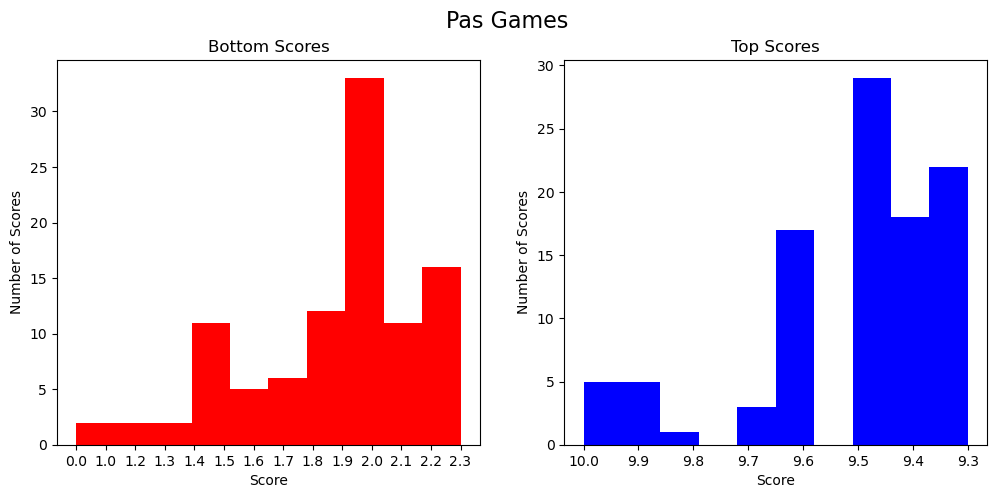

In [32]:
fig1, ax1 = plt.subplots(1,2, figsize = (12,5))

ax1[0].hist(df1['score'], color = 'red')
ax1[1].hist(df2['score'], color = 'blue')

plt.suptitle('Pas Games', fontsize=16)

ax1[0].set_title('Bottom Scores')
ax1[1].set_title('Top Scores')

ax1[0].set_xlabel('Score')
ax1[0].set_ylabel('Number of Scores')

ax1[1].set_xlabel('Score')
ax1[1].set_ylabel('Number of Scores')

plt.show()

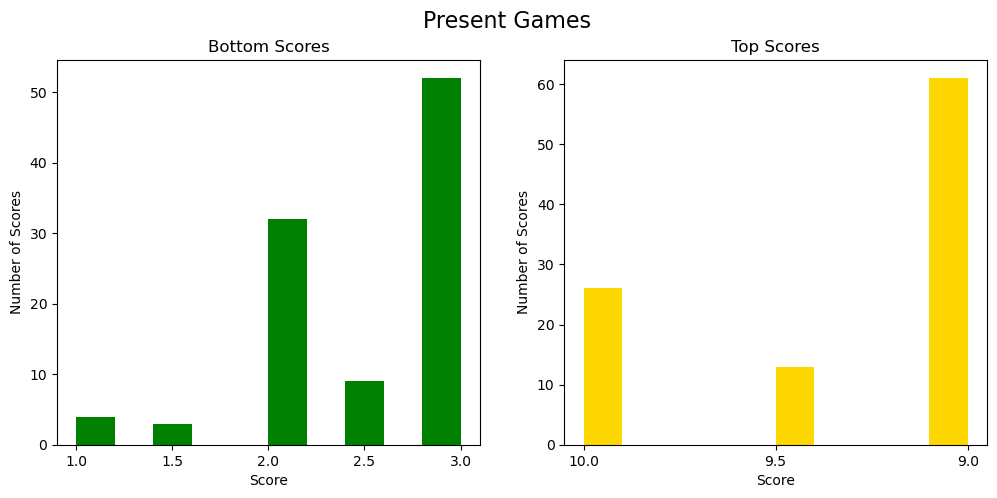

In [31]:
fig2, ax2 = plt.subplots(1,2, figsize = (12,5))

ax2[0].hist(df3['score'], color = 'green')
ax2[1].hist(df4['score'], color = 'gold')

plt.suptitle('Present Games', fontsize=16)


ax2[0].set_title('Bottom Scores')
ax2[1].set_title('Top Scores')

ax2[0].set_xlabel('Score')
ax2[0].set_ylabel('Number of Scores')

ax2[1].set_xlabel('Score')
ax2[1].set_ylabel('Number of Scores')

plt.show()

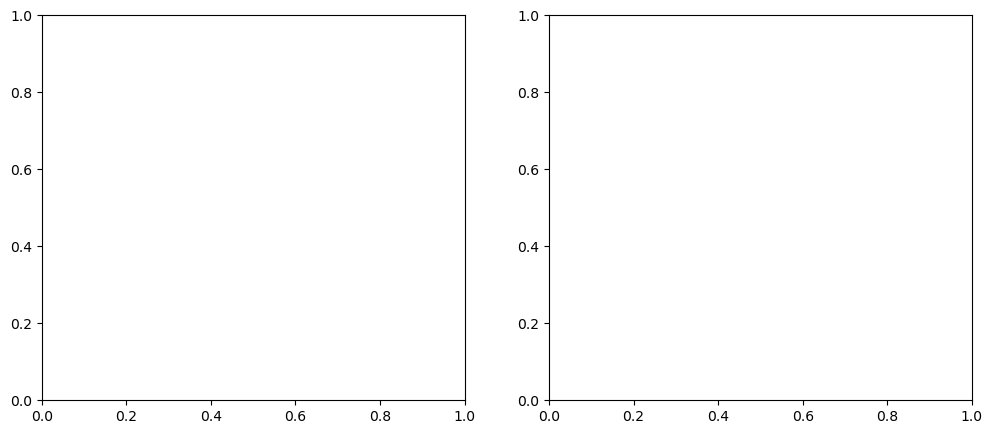

In [27]:
fig3, ax3 = plt.subplots(1,2, figsize = (12,5))

ax2[0].hist(data_past_final['score'], color = 'green')
ax2[1].hist(data_pres_final['score'], color = 'gold')


ax2[0].set_title('Bottom Scores')
ax2[1].set_title('Top Scores')

ax2[0].set_xlabel('Score')
ax2[0].set_ylabel('Number of Scores')

ax2[1].set_xlabel('Score')
ax2[1].set_ylabel('Number of Scores')

plt.show()

Other than a couple minor fixes, I have the data and most of the code that I need to complete my report.